In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm

In [14]:
df=pd.read_csv('insurance.csv')
df.head()
df.shape
df.describe()
df.info()
df.columns
df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [15]:
x=df.drop('charges',axis=1)
y=df['charges']
x,y

(      age     sex     bmi  children smoker     region
 0      19  female  27.900         0    yes  southwest
 1      18    male  33.770         1     no  southeast
 2      28    male  33.000         3     no  southeast
 3      33    male  22.705         0     no  northwest
 4      32    male  28.880         0     no  northwest
 ...   ...     ...     ...       ...    ...        ...
 1333   50    male  30.970         3     no  northwest
 1334   18  female  31.920         0     no  northeast
 1335   18  female  36.850         0     no  southeast
 1336   21  female  25.800         0     no  southwest
 1337   61  female  29.070         0    yes  northwest
 
 [1338 rows x 6 columns],
 0       16884.92400
 1        1725.55230
 2        4449.46200
 3       21984.47061
 4        3866.85520
            ...     
 1333    10600.54830
 1334     2205.98080
 1335     1629.83350
 1336     2007.94500
 1337    29141.36030
 Name: charges, Length: 1338, dtype: float64)

In [16]:
x["sex"] = x["sex"].map({"male": 1, "female": 0})
x["smoker"] = x["smoker"].map({"yes": 1, "no": 0})
x = pd.get_dummies(x, columns=["region"], drop_first=True)

In [17]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
x_scaled = pd.DataFrame(x_scaled, columns=x.columns)
x_test, x_train, y_test, y_train = train_test_split(x_scaled, y, test_size=0.2, random_state=42)

In [18]:
model = LinearRegression()
model.fit(x_train, y_train)

y_pred = model.predict(x_test)
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("R2 Score:", r2)
print("Mean Absolute Error:", mae)
print("Mean Squared Error:", mse)


R2 Score: 0.7347039968924342
Mean Absolute Error: 4187.656196415641
Mean Squared Error: 38291133.01290261


In [20]:
coefficients = pd.DataFrame({
    "Feature": x.columns,
    "Coefficient": model.coef_
}).sort_values(by="Coefficient", ascending=False)

coefficients


,Feature,Coefficient
4,smoker,10009.035654
0,age,3547.377585
2,bmi,2174.774773
3,children,880.370325
5,region_northwest,-186.260116
1,sex,-236.958564
7,region_southwest,-753.510447
6,region_southeast,-1162.643143


In [22]:
x_vif = sm.add_constant(x_scaled)

vif_data = pd.DataFrame()
vif_data["Feature"] = x_vif.columns
vif_data["VIF"] = [
    variance_inflation_factor(x_vif.values, i)
    for i in range(x_vif.shape[1])
]

vif_data


,Feature,VIF
0,const,1.000000
1,age,1.016822
2,sex,1.008900
3,bmi,1.106630
4,children,1.004011
5,smoker,1.012074
6,region_northwest,1.518823
7,region_southeast,1.652230
8,region_southwest,1.529411


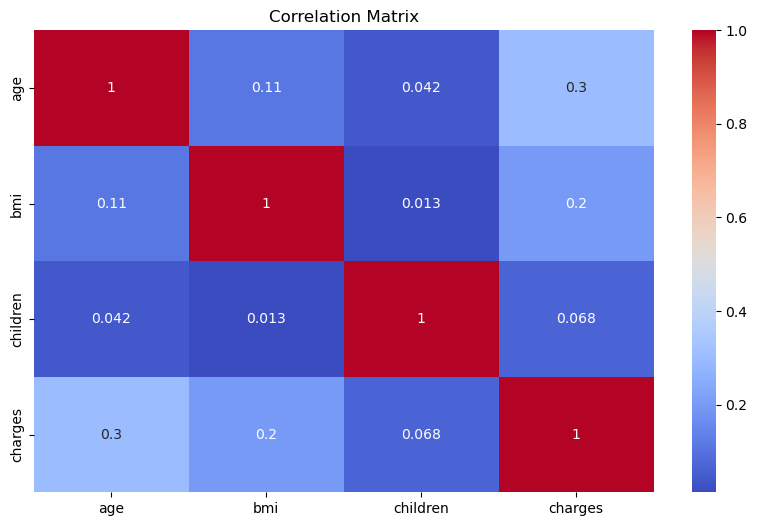

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
